In [14]:
from framework import *
from rand import *

In [15]:
def create_n_model(n, delay = 1, max_queue = 10):
    create = Create(delay, 'create')
    processes = []

    for i in range(n):
        processes.append(Process(delay, 'process' + str(i), max_queue))
    
    create.next_elements = [processes[0]]
    for i in range(n - 1):
        processes[i].next_elements = [processes[i + 1]]
    
    all_elements = [create] + processes

    model = Model(all_elements)
    return model

Simulation for n=10 took 0.02740311622619629 seconds.
Simulation for n=20 took 0.049616336822509766 seconds.
Simulation for n=30 took 0.07537460327148438 seconds.
Simulation for n=40 took 0.10340666770935059 seconds.
Simulation for n=50 took 0.12629246711730957 seconds.
Simulation for n=60 took 0.14590954780578613 seconds.
Simulation for n=70 took 0.17673230171203613 seconds.
Simulation for n=80 took 0.19496941566467285 seconds.
Simulation for n=90 took 0.2196636199951172 seconds.
Simulation for n=100 took 0.2409965991973877 seconds.
Simulation for n=110 took 0.2599964141845703 seconds.
Simulation for n=120 took 0.2802584171295166 seconds.
Simulation for n=130 took 0.3114502429962158 seconds.
Simulation for n=140 took 0.3582496643066406 seconds.
Simulation for n=150 took 0.3994007110595703 seconds.
Simulation for n=160 took 0.40344834327697754 seconds.
Simulation for n=170 took 0.4142889976501465 seconds.
Simulation for n=180 took 0.44281601905822754 seconds.
Simulation for n=190 took 

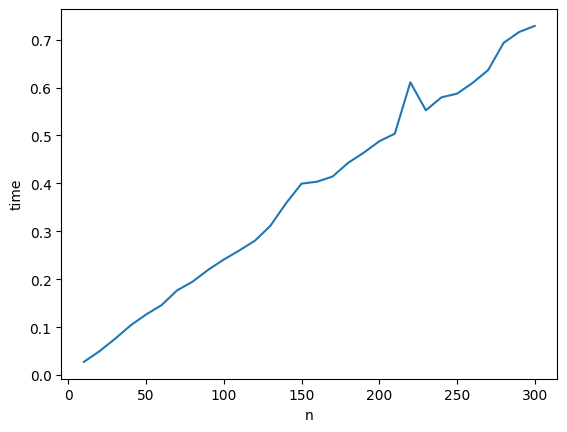

In [16]:
import time

stats = dict()

for n in range(10, 301, 10):
    start_time = time.time()
    model = create_n_model(n)
    model.simulate(1000, logging=False)
    end_time = time.time()

    stats[n] = end_time - start_time

    print(f"Simulation for n={n} took {end_time - start_time} seconds.")

import matplotlib.pyplot as plt

plt.plot(stats.keys(), stats.values())
plt.xlabel('n')
plt.ylabel('time')
plt.show()


In [17]:
# same experiment but different model structure

def create_n_model_different_structure(n, delay = 1, max_queue = 10):
    create = Create(delay, 'create')
    
    processes1 = []
    for i in range(int(n/2)):
        processes1.append(Process(delay, 'process' + str(i), max_queue))
    
    processes2 = []
    for i in range(int(n/2)):
        processes2.append(Process(delay, 'process' + str(i), max_queue))

    create.next_elements = [processes1[0], processes2[0]]
    for i in range(int(n/2 - 1)):
        processes1[i].next_elements = [processes1[i + 1]]
        processes2[i].next_elements = [processes2[i + 1]]
    
    all_elements = [create] + processes1 + processes2

    model = Model(all_elements)
    return model

Simulation for n=10 took 0.015718460083007812 seconds.
Simulation for n=20 took 0.036125898361206055 seconds.
Simulation for n=30 took 0.044675588607788086 seconds.
Simulation for n=40 took 0.06079816818237305 seconds.
Simulation for n=50 took 0.07675480842590332 seconds.
Simulation for n=60 took 0.10044097900390625 seconds.
Simulation for n=70 took 0.10758209228515625 seconds.
Simulation for n=80 took 0.12717604637145996 seconds.
Simulation for n=90 took 0.13863325119018555 seconds.
Simulation for n=100 took 0.14946460723876953 seconds.
Simulation for n=110 took 0.19663143157958984 seconds.
Simulation for n=120 took 0.19093799591064453 seconds.
Simulation for n=130 took 0.20957660675048828 seconds.
Simulation for n=140 took 0.23506999015808105 seconds.
Simulation for n=150 took 0.2696850299835205 seconds.
Simulation for n=160 took 0.2497239112854004 seconds.
Simulation for n=170 took 0.25927305221557617 seconds.
Simulation for n=180 took 0.28373146057128906 seconds.
Simulation for n=1

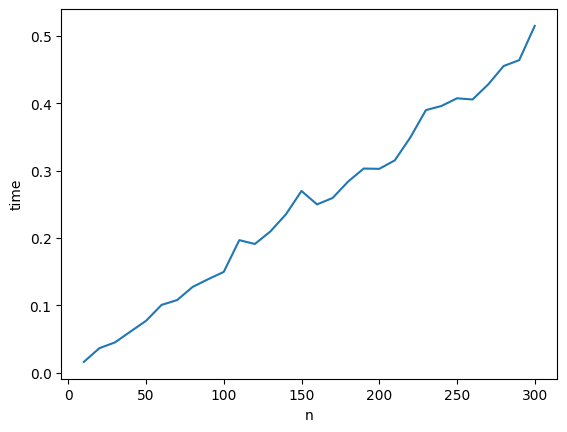

In [18]:
import time

stats = dict()

for n in range(10, 301, 10):
    start_time = time.time()
    model = create_n_model_different_structure(n)
    model.simulate(1000, logging=False)
    end_time = time.time()

    stats[n] = end_time - start_time

    print(f"Simulation for n={n} took {end_time - start_time} seconds.")

import matplotlib.pyplot as plt

plt.plot(stats.keys(), stats.values())
plt.xlabel('n')
plt.ylabel('time')
plt.show()